# 12-8. 프로젝트 : 나랑 닮은 연예인을 찾아보자


## Step1. 사진 모으기

1. 내 사진 찍기 

내 사진을 2장 이상 포함합시다.
내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 봅시다. 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.
혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 봅시다.
2. 비교할 연예인 사진 모으기

많이 모을 수록 나와 더 닮은 연예인을 찾을 가능성이 높아질 것입니다.
주위의 동료들과 모은 사진을 주고받는 것도 하나의 방법입니다.

### * 내 사진 2장으로 임베딩 벡터 거리 구하기

In [1]:
# 패키지 호출
import face_recognition
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 경로 설정
my_image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/me/me.jpg'
my_image_path_2 = os.getenv('HOME')+'/aiffel/face_embedding/images/me/me2.jpg'

# 이미지 객체 저장
my_image = face_recognition.load_image_file(my_image_path)
my_image_2 = face_recognition.load_image_file(my_image_path_2)

# 얼굴만 따로 인식하는 함수(face_locations) 적용
my_face = face_recognition.face_locations(my_image)
my_face_2 = face_recognition.face_locations(my_image_2)

a, b, c, d = my_face[0]
a_2, b_2, c_2, d_2 = my_face_2[0]

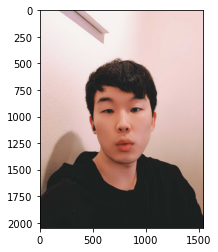

In [3]:
plt.imshow(my_image)

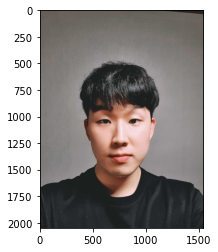

In [4]:
plt.imshow(my_image_2)

In [5]:
my_face

[(788, 1034, 1343, 479)]

In [6]:
my_face_2

[(872, 1093, 1538, 428)]

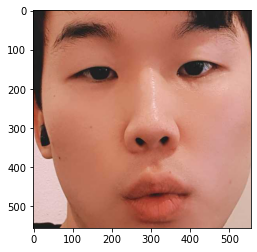

In [7]:
cropped_my_face = my_image[a:c, d:b, :]
plt.imshow(cropped_my_face)

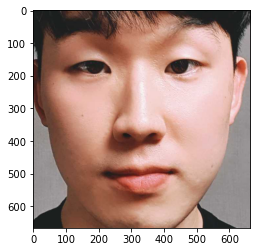

In [8]:
cropped_my_face_2 = my_image_2[a_2:c_2, d_2:b_2, :]
plt.imshow(cropped_my_face_2)

In [9]:
cropped_my_face

array([[[ 32,  32,  32],
        [ 34,  34,  34],
        [ 34,  34,  34],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34]],

       [[ 32,  32,  32],
        [ 34,  34,  34],
        [ 34,  34,  34],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34]],

       [[ 32,  32,  32],
        [ 34,  34,  34],
        [ 34,  34,  34],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34]],

       ...,

       [[ 27,  31,  30],
        [ 27,  31,  30],
        [ 27,  31,  30],
        ...,
        [211, 183, 171],
        [211, 183, 171],
        [211, 183, 171]],

       [[ 29,  31,  26],
        [ 29,  30,  32],
        [ 29,  30,  32],
        ...,
        [210, 182, 170],
        [211, 183, 171],
        [211, 183, 171]],

       [[ 30,  31,  25],
        [ 30,  30,  32],
        [ 30,  30,  32],
        ...,
        [209, 181, 169],
        [211, 183, 171],
        [211, 183, 171]]

In [10]:
# 자른 얼굴 이미지 => 임베딩 벡터로 변환
embedding_my_face = face_recognition.face_encodings(cropped_my_face)
embedding_my_face

[array([-0.11384348,  0.06135002,  0.05669689, -0.05425121, -0.14827344,
         0.0128824 , -0.04519107, -0.12726033,  0.07135156, -0.09920026,
         0.27125683, -0.1276653 , -0.22265963, -0.10715596, -0.07887361,
         0.19156295, -0.17596765, -0.13189816, -0.02223337, -0.00270472,
         0.13009098,  0.03406073, -0.01766434,  0.03534069, -0.09914556,
        -0.32293305, -0.08039045, -0.06290359,  0.00410594, -0.09511697,
        -0.04821543,  0.09919018, -0.20214365, -0.03996687,  0.04155042,
         0.07305494, -0.01429619, -0.09226015,  0.13199642, -0.03869726,
        -0.1881889 ,  0.06306066,  0.03690447,  0.21657699,  0.15421586,
         0.0144088 ,  0.0157703 , -0.15282728,  0.11537283, -0.1641788 ,
        -0.01055009,  0.16962345,  0.08438239,  0.01744105,  0.01615927,
        -0.1226461 , -0.01651977,  0.10776281, -0.10508858,  0.04187477,
         0.05041695, -0.0918199 , -0.00441181, -0.20478676,  0.1739959 ,
         0.02370584, -0.11783554, -0.1882214 ,  0.1

In [11]:
cropped_my_face_2

array([[[ 27,  31,  30],
        [ 27,  31,  30],
        [ 27,  31,  30],
        ...,
        [ 57,  57,  57],
        [ 28,  28,  28],
        [ 25,  25,  25]],

       [[ 27,  31,  30],
        [ 27,  31,  30],
        [ 27,  31,  30],
        ...,
        [ 55,  55,  55],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[ 27,  31,  30],
        [ 27,  31,  30],
        [ 27,  31,  30],
        ...,
        [ 51,  51,  51],
        [ 33,  33,  33],
        [ 34,  34,  34]],

       ...,

       [[ 27,  31,  30],
        [ 27,  31,  30],
        [ 27,  31,  30],
        ...,
        [152, 148, 149],
        [154, 150, 151],
        [154, 150, 151]],

       [[ 27,  31,  30],
        [ 27,  31,  30],
        [ 27,  31,  30],
        ...,
        [152, 148, 149],
        [153, 149, 150],
        [153, 149, 150]],

       [[ 27,  31,  30],
        [ 27,  31,  30],
        [ 27,  31,  30],
        ...,
        [152, 148, 149],
        [153, 149, 150],
        [153, 149, 150]]

In [12]:
embedding_my_face_2 = face_recognition.face_encodings(cropped_my_face_2)
embedding_my_face_2

[array([-0.08470576,  0.06685174,  0.02529639, -0.02592246, -0.11347302,
         0.02773678, -0.07319801, -0.13549604,  0.02659626, -0.08824143,
         0.24312812, -0.12049112, -0.24991494, -0.07349803, -0.07464442,
         0.1901096 , -0.12125877, -0.11865763, -0.05870523,  0.00514951,
         0.07389701,  0.05465858,  0.01417643,  0.02829891, -0.11206225,
        -0.31678468, -0.06261397, -0.07516904, -0.00211061, -0.09856521,
        -0.07200335,  0.02239955, -0.1780687 ,  0.00631469,  0.04674745,
         0.05149826, -0.03549473, -0.06060773,  0.12500024,  0.00555939,
        -0.20790906,  0.03927235,  0.0279047 ,  0.25629815,  0.18759193,
         0.06597856,  0.02284396, -0.17054516,  0.10602414, -0.16636959,
         0.01039232,  0.11893294,  0.08849568,  0.0184235 , -0.03812831,
        -0.09711011, -0.00514437,  0.11312996, -0.13118783,  0.06708873,
         0.11360446, -0.06624845, -0.04179354, -0.16803867,  0.21758823,
         0.00592554, -0.16463959, -0.16900593,  0.1

In [13]:
# 얼굴 영역으로 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [14]:
embedding_my_face_2 = get_face_embedding(cropped_my_face_2)
embedding_my_face_2

[array([-0.08470576,  0.06685174,  0.02529639, -0.02592246, -0.11347302,
         0.02773678, -0.07319801, -0.13549604,  0.02659626, -0.08824143,
         0.24312812, -0.12049112, -0.24991494, -0.07349803, -0.07464442,
         0.1901096 , -0.12125877, -0.11865763, -0.05870523,  0.00514951,
         0.07389701,  0.05465858,  0.01417643,  0.02829891, -0.11206225,
        -0.31678468, -0.06261397, -0.07516904, -0.00211061, -0.09856521,
        -0.07200335,  0.02239955, -0.1780687 ,  0.00631469,  0.04674745,
         0.05149826, -0.03549473, -0.06060773,  0.12500024,  0.00555939,
        -0.20790906,  0.03927235,  0.0279047 ,  0.25629815,  0.18759193,
         0.06597856,  0.02284396, -0.17054516,  0.10602414, -0.16636959,
         0.01039232,  0.11893294,  0.08849568,  0.0184235 , -0.03812831,
        -0.09711011, -0.00514437,  0.11312996, -0.13118783,  0.06708873,
         0.11360446, -0.06624845, -0.04179354, -0.16803867,  0.21758823,
         0.00592554, -0.16463959, -0.16900593,  0.1

In [ ]:
print(len(embedding_my_face[0]))

    * 임베딩 벡터간 거리 구하기

In [19]:
my_face_distance = np.linalg.norm(embedding_my_face - embedding_my_face_2[0], axis=1, ord=2)
my_face_distance

array([0.35887076])

In [20]:
print("내 얼굴 간 거리 : {}".format(my_face_distance[0]))

내 얼굴 간 거리 : 0.3588707568928571


## Step2. 얼굴 영역 자르기

    * 임베딩 추출을 위한 얼굴 자르기
    * Step1의 get_gropped_face(image_file)이용
    * 자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤,
    * 다양한 시각화 시도 해보기

In [ ]:
#    힌트
#    from PIL import Image
#    face = get_gropped_face(image_path)
#    pillow_image = Image.fromarray(face)
#    pillow_image.save(path_to_save)

In [23]:
# 패키지 호출
from PIL import Image

    * 얼굴부분만 자르는 함수 정의

In [24]:
def get_gropped_face(image_file):
    
    image = face_recognition.load_image_file(image_file)
    
    face_locations = face_recognition.face_locations(image)
    
    a,b,c,d = face_locations[0]
    
    cropped_face = image[a:c, d:b, :]
    
    return cropped_face

    * 연예인 얼굴 이미지 임베딩

In [28]:
# 폴더 + 파일 경로
dir_path = os.getenv('HOME') + '/aiffel/face_embedding/images/celebrity'

# 폴더 안의 각 연예인 이미지 폴더 경호 저장
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['엄정화.jpeg', '하정우.jpeg', '박소담.jpeg', '박해일.jpeg', '김영철.jpeg', '공효진.jpeg', '홍진경.jpeg', '김연아.jpeg', '한가인.jpeg', '공유.jpeg', '이연희.jpeg', '성동일.jpeg', '정우성.jpeg', '이제훈.jpg', '송지효.jpeg', '이병헌.jpeg', '이효리.jpeg', 'trump.jpg', '안소희.jpeg', '김우빈.jpeg', '키아누 리브스.jpeg', '박정민.jpg', 'biden.jpg', '수지.jpeg', '박서준.jpg', '박보검.jpeg', '류준열.jpg', 'clinton.jpeg', '강동원.jpeg', '이승기.jpeg', '안재홍.jpg', '전미선.jpeg', '장동건.jpeg', '이수근.jpeg', '박진영.jpeg', '제니.jpeg', '유승호.jpeg', '아이유.jpeg', '박민영.jpeg', 'bush.jpeg', '설현.jpeg', '신세경.jpeg', '다현.jpeg', '천우희.jpeg', '김하늘.jpeg', '박신혜.jpeg', 'obama.jpg', '아이린.jpeg', '최우식.jpg', '유재석.jpeg', '김민교.jpeg', '김유정.jpeg', '옥택연.jpeg', '아이비.jpeg', '김생민.jpeg', '현빈.jpeg', '붐.jpeg']


In [35]:
# # 연예인 이미지들을 얼굴만 오리기
# celebrity_face = []

# for file in file_list:
#     celebrity_images_paths = os.path.join(dir_path, file)
#     celebrity_face.append(get_gropped_face(celebrity_images_paths))
    

In [42]:
path_to_save = os.getenv('HOME') + '/aiffel/face_embedding/images/celebrity/cropped/'

# 연예인 이미지들을 얼굴만 오려서 저장
for file in file_list:
    celebrity_images_paths = os.path.join(dir_path, file)
    celebrity_face = get_gropped_face(celebrity_images_paths)
    pillow_image = Image.fromarray(celebrity_face)
    pillow_image.save(path_to_save+file)

## Step3. 얼굴 영역의 임베딩 추출하기

    * face_recognition 를 사용해서 이미지를 불러오고 임베딩을 추출
    * 다른 사람의 임베딩은 구분할 수 있게 따로 저장
    * def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
    * def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [72]:
# 폴더 내 이미지들을 임베딩 하는 함수 정의
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict={}
    dir_path_2 = dir_path+'/'
    
    for file in file_list:
        img_path = os.path.join(dir_path_2, file)
        face = face_recognition.load_image_file(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로
            
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름 저장됨
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [73]:
cropped_dir_path = os.getenv('HOME') + '/aiffel/face_embedding/images/celebrity/cropped'
celebrity_dict = get_face_embedding_dict(cropped_dir_path)

In [74]:
celebrity_dict

{'하정우': array([-0.05209925,  0.04180185,  0.06768046, -0.01174797, -0.0405224 ,
        -0.03021935, -0.06201094, -0.12581788,  0.08396536, -0.06079007,
         0.1782832 , -0.06334554, -0.13039012, -0.13980106, -0.10054778,
         0.16152152, -0.15150689, -0.15418747, -0.06313649, -0.01978869,
         0.09156994,  0.03636065, -0.02341549,  0.00258972, -0.08351029,
        -0.29971993, -0.05581506, -0.07579846,  0.02645943,  0.02432854,
        -0.09873222,  0.07176976, -0.2182539 , -0.09382487,  0.08397122,
         0.14083302, -0.02210321, -0.0456664 ,  0.14788069,  0.03685291,
        -0.15260096,  0.05346391,  0.11217433,  0.22991547,  0.19553755,
        -0.01835274,  0.05198655, -0.14184386,  0.12402298, -0.10854922,
         0.02328453,  0.18321015,  0.16564316,  0.14872964,  0.04079507,
        -0.09895614,  0.0855695 ,  0.09516956, -0.08462571,  0.05453873,
         0.13444965, -0.0330427 , -0.00775493, -0.05382623,  0.19376174,
        -0.01238292, -0.08818396, -0.2204439

In [80]:
celebrity_dict.items()

dict_items([('하정우', array([-0.05209925,  0.04180185,  0.06768046, -0.01174797, -0.0405224 ,
       -0.03021935, -0.06201094, -0.12581788,  0.08396536, -0.06079007,
        0.1782832 , -0.06334554, -0.13039012, -0.13980106, -0.10054778,
        0.16152152, -0.15150689, -0.15418747, -0.06313649, -0.01978869,
        0.09156994,  0.03636065, -0.02341549,  0.00258972, -0.08351029,
       -0.29971993, -0.05581506, -0.07579846,  0.02645943,  0.02432854,
       -0.09873222,  0.07176976, -0.2182539 , -0.09382487,  0.08397122,
        0.14083302, -0.02210321, -0.0456664 ,  0.14788069,  0.03685291,
       -0.15260096,  0.05346391,  0.11217433,  0.22991547,  0.19553755,
       -0.01835274,  0.05198655, -0.14184386,  0.12402298, -0.10854922,
        0.02328453,  0.18321015,  0.16564316,  0.14872964,  0.04079507,
       -0.09895614,  0.0855695 ,  0.09516956, -0.08462571,  0.05453873,
        0.13444965, -0.0330427 , -0.00775493, -0.05382623,  0.19376174,
       -0.01238292, -0.08818396, -0.22044399

##  Step 4. 모은 연예인들과 비교하기

    * 내 얼굴 사진에서 추출한 임베딩 벡터와 연예인 임베딩 벡터와 비교하여 가장 가까운 거리 찾기
    * 이전 스텝에서 만들었던 get_nearest_face(name, top=5) 함수들을 응용

In [77]:
# # name1과 name2의 거리 비교
# def get_distance(name1, name2):
#     return np.linalg.norm(celebrity_dict[name1] - celebrity_dict[name2], ord=2)

# get_distance('하정우', '박해일')

0.4418914336885648

In [78]:
# def get_sort_key_func(name1):
#     def get_distance_from_name1(name2):
#         return get_distance(name1, name2)
#     return get_distance_from_name1

# sort_key_func = get_sort_key_func('박해일')

In [79]:
# sort_key_func('하정우')

0.4418914336885648

In [81]:
# sorted(celebrity_dict.items(), key = lambda x:sort_key_func(x[0]))

[('박해일',
  array([-0.0418421 ,  0.09985041,  0.03994578, -0.08300374, -0.10843538,
          0.02938114, -0.03329489, -0.09570654,  0.0788867 , -0.09467766,
          0.18353482, -0.05696357, -0.20592369, -0.098883  , -0.07241612,
          0.18576331, -0.17957282, -0.10740253, -0.06186191, -0.0406619 ,
          0.10244052,  0.05716085,  0.00262298,  0.00519442, -0.11093894,
         -0.27032611, -0.0801397 , -0.02005799,  0.0325794 , -0.04475832,
         -0.07110739,  0.04015306, -0.17953831, -0.03834037,  0.02305637,
          0.08472309, -0.01217261, -0.09920304,  0.14081059,  0.05560792,
         -0.14887699,  0.08231229,  0.03801646,  0.24298099,  0.19851714,
         -0.01524832,  0.05470388, -0.09060343,  0.12531018, -0.13572016,
         -0.00217308,  0.14212218,  0.09647027,  0.07793869, -0.00434074,
         -0.07797183,  0.02124598,  0.14015776, -0.08492094, -0.0037794 ,
          0.11163977, -0.05328592, -0.04674909, -0.11956845,  0.16556419,
          0.04447422, -0.1124

In [82]:
# def get_nearest_face(name, top=5):
#     sort_key_func = get_sort_key_func(name)
#     sorted_faces = sorted(celebrity_dict.items(), key = lambda x : sort_key_func(x[0]))
    
#     for i in range(top+1):
#         if i==0:
#             continue
#         if sorted_faces[i]:
#             print('순위:{}, 이름:{}, 거리:{}'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [83]:
# get_nearest_face('박소담')

순위:1, 이름:박신혜, 거리:0.37905525243231836
순위:2, 이름:한가인, 거리:0.42601352819568356
순위:3, 이름:박민영, 거리:0.4290341071599514
순위:4, 이름:박해일, 거리:0.43893837035713473
순위:5, 이름:홍진경, 거리:0.4474812474431714


In [84]:
# 나의 임베딩 벡터와 연예인의 임베딩 벡터간 거리 구하는 함수 정의
def get_distance_with_me(name):
    return np.linalg.norm(embedding_my_face[0] - celebrity_dict[name], ord=2)

In [76]:
# 함수 실행 test
a = get_distance_with_me('박해일')
a

0.4472197119018379

In [85]:
# 나와 가까은 거리의 5명 연예인 출력 함수 정의
def get_nearset_face_me(top=5):
    
    # 나의 임베딩 벡터와의 거리를 이용해서 연예인 딕셔너리 정렬
    sorted_faces_me = sorted(celebrity_dict.items(), key = lambda x: get_distance_with_me(x[0]))
    
    for i in range(top):
        if sorted_faces_me[i]:
            print('순위:{}, 이름:{}, 거리:{}'.format(i+1, sorted_faces_me[i][0], get_distance_with_me(sorted_faces_me[i][0])))
    

In [87]:
# 함수 실행
get_nearset_face_me()

순위:1, 이름:최우식, 거리:0.4243307525436818
순위:2, 이름:박소담, 거리:0.4341114178377397
순위:3, 이름:이제훈, 거리:0.43751179273599683
순위:4, 이름:안재홍, 거리:0.44163834861404666
순위:5, 이름:박해일, 거리:0.4472197119018379


## Step 5. 다양한 재미있는 시각화 시도해 보기

    * tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후, 그 이미지와 닮은 얼굴을 찾는 형태로 구현


In [139]:
from tkinter import *
from tkinter import filedialog
import tkinter
import tkinter.ttk as ttk           # 라벨 생성
import tkinter.messagebox as tmb    # 메시지 박스 사용

from PIL import Image

# import base64


import sys  # 경로 설정

# Tk 클래스 인스턴스 생성
window=Tk()


window.title('닮은꼴 연예인 Top 5 탐색기!')    # 창 제목

window.geometry("480x320")    # 창 크기 지정
window.resizable(True, True)    # 창 가로 세로 크기 조절 가능




# 버튼 클릭 이벤트 핸들러 정의
def click():
    
    # 파일 선택 창 호출 + 선택된 파일 경로 추출
    selected_img_path = filedialog.askopenfile(initialdir=os.getenv('HOME')+'/aiffel', title = '이미지를 선택하세요!')
    
    # 이미지 객체 저장
    selected_img = face_recognition.load_image_file(selected_img_path)
    
    # 얼굴만 잘라서 따로 인식
    selected_img_cropped_face = face_recognition.face_locations(selected_img)
    
    # 이미지 띄우기
#     base64.b64decode(a).decode('utf-8')
#     img = tkinter.PhotoImage(file=selected_img)
    f = open(selected_img_path, 'rb')
    img = Image.open(f)

    img_label_1 = tkinter.Label(window, image=img)
    img_label_1.place(x=40, y=40)

#     print(window.select_file.name)
#     window.dirName = filedialog.askdirectory()    # 폴더 경로 선택
#     tmb.showinfo('메시지 박스 제목', '메시지 박스 내용')    # 메시지 박스의 제목, 내용
    
# 버튼 생성
action = ttk.Button(window, text='이미지 입력', command=click)
action.place(x=20, y=20)

# 이벤트 루프
window.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-139-42d982358c9b>", line 33, in click
    selected_img = face_recognition.load_image_file(selected_img_path)
  File "/home/aiffel0042/.local/lib/python3.7/site-packages/face_recognition/api.py", line 86, in load_image_file
    im = PIL.Image.open(file)
  File "/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/PIL/Image.py", line 2887, in open
    prefix = fp.read(16)
  File "/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte


# 결론
    
    * Step 5는 만들다가 Tkinter를 이용한 GUI 프로그램을 만들려고 시도했으나
      image를 불러올때 UnicodeDecodeError가 발생합니다.
      
    * 일단 먼저 제출하고, 추후에 해결 방안을 찾아 갱신하려합니다.

In [133]:
from tkinter import *
from tkinter import filedialog
import tkinter
import tkinter.ttk as ttk           # 라벨 생성
import tkinter.messagebox as tmb    # 메시지 박스 사용


import sys  # 경로 설정

# Tk 클래스 인스턴스 생성
window=Tk()


window.title('닮은꼴 연예인 Top 5 탐색기!')    # 창 제목

window.geometry("480x320")    # 창 크기 지정
window.resizable(True, True)    # 창 가로 세로 크기 조절 가능

img = tkinter.PhotoImage(file='me.jpg')
img_label_1 = tkinter.Label(window, image=img)
img_label_1.place(x=40, y=40)


# 이벤트 루프
window.mainloop()

TclError: couldn't open "me.jpg": no such file or directory

In [115]:
filedialog.askopenfile??

In [ ]:
window.select_file = filedialog.askopenfile(initialdir='path', title="이미지 선택", filetypes=('all files', '*.*'))

In [ ]:
from tkinter import *
import tkinter.ttk as ttk           # 라벨 생성
import tkinter.messagebox as tmb    # 메시지 박스 사용

import sys  # 경로 설정

# Tk 클래스 인스턴스 생성
window=Tk()


window.title('닮은꼴 연예인 Top 5 탐색기!')    # 창 제목

window.geometry("480x320")    # 창 크기 지정
window.resizable(True, True)    # 창 가로 세로 크기 조절 가능

# 라벨 생성
label1 = ttk.Label(window,text='label')    # 라벨을 생성(text = 텍스트 내용)
label1.grid(column=0, row=0)    # 위 생성된 라벨의 레이아웃을 지정

# 텍스트 박스 생성
text1 = Text(window, width=60, height=40)    # 텍스트 박스 크기 지정
text1.grid(row=1, column=0, padx=20, pady=10) # 생성된 텍스트 박스의 레이아웃 지정

# 버튼 클릭 이벤트 핸들러 정의
def click():
    label1.configure(text='버튼 눌림')  # 버튼 누르면 label1 의 텍스트 내용 변경
    tmb.showinfo('메시지 박스 제목', '메시지 박스 내용')    # 메시지 박스의 제목, 내용
    
# 버튼 생성
action = ttk.Button(window, text='이미지 입력', command=click)
action.grid(row=0, column=1)

# 이벤트 루프
window.mainloop()